# Plot LBA SST's

In [3]:
from sst_bst_2 import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
#input_label = [ f'LBA_{cnt//2}Y' if cnt%2 else f'LBA_{cnt//2}X' for cnt in range(18)]
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
print(input_label)

['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']


In [5]:
sis=range(18); #signal inputs
START_TIME="2022-11-25 12:00:00"
#START_TIME="2022-11-26 00:00:00"
END_TIME=  "2022-11-28 00:00:00"
tstep_min=10;
#bands=range(512) #all bands

In [6]:
filename="LBA_%s_%imin.npy"%(START_TIME,tstep_min)
sst=SSTs('sst') #sst directoty
if False:
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    sst.getData_percentile(tstart,tend,sis,60*tstep_min) 
    print(sst.D.shape)
    np.save(filename,sst.D)
else:
    sst.D=np.load(filename)
    print(sst.D.shape)

(396, 18, 512)


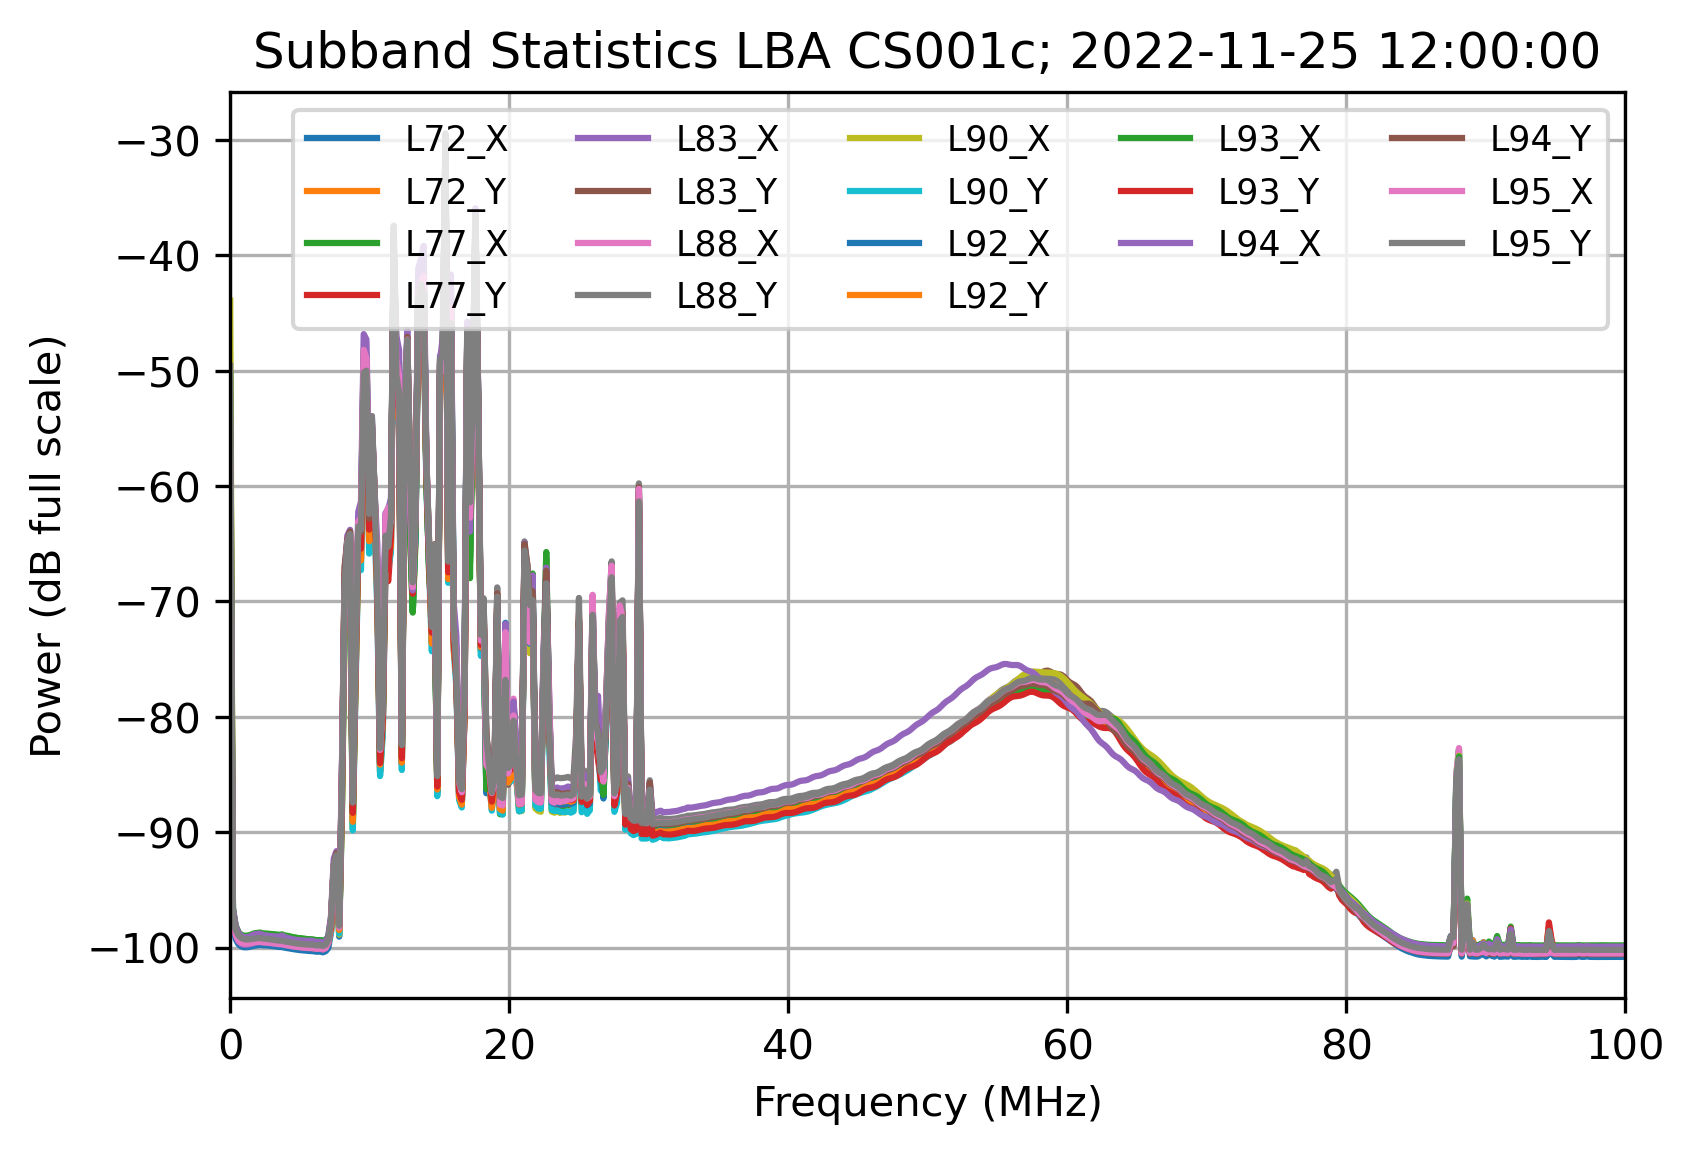

In [7]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
STATION_NAME = 'CS001c'
f_as = [(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)]
for cnt, f_si in enumerate(sst.D[1,:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
plt.grid()
plt.xlim([0,100])
plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()    

In [15]:
freqs=np.arange(512)/512*100
freq1=40;i1=np.argmin(np.abs(freqs-freq1))
freq2=70;i2=np.argmin(np.abs(freqs-freq2))
freq3=62;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [16]:
#sky=np.load("../L2TS_cal/Sky2022-11-04-16-00-00_40.npy")
#skyhour=np.arange(24*60/60)
#print(sky.shape,len(skyhour))

In [8]:
sst.plot_sst_time(START_TIME = START_TIME)

NameError: name 'tstep_min' is not defined

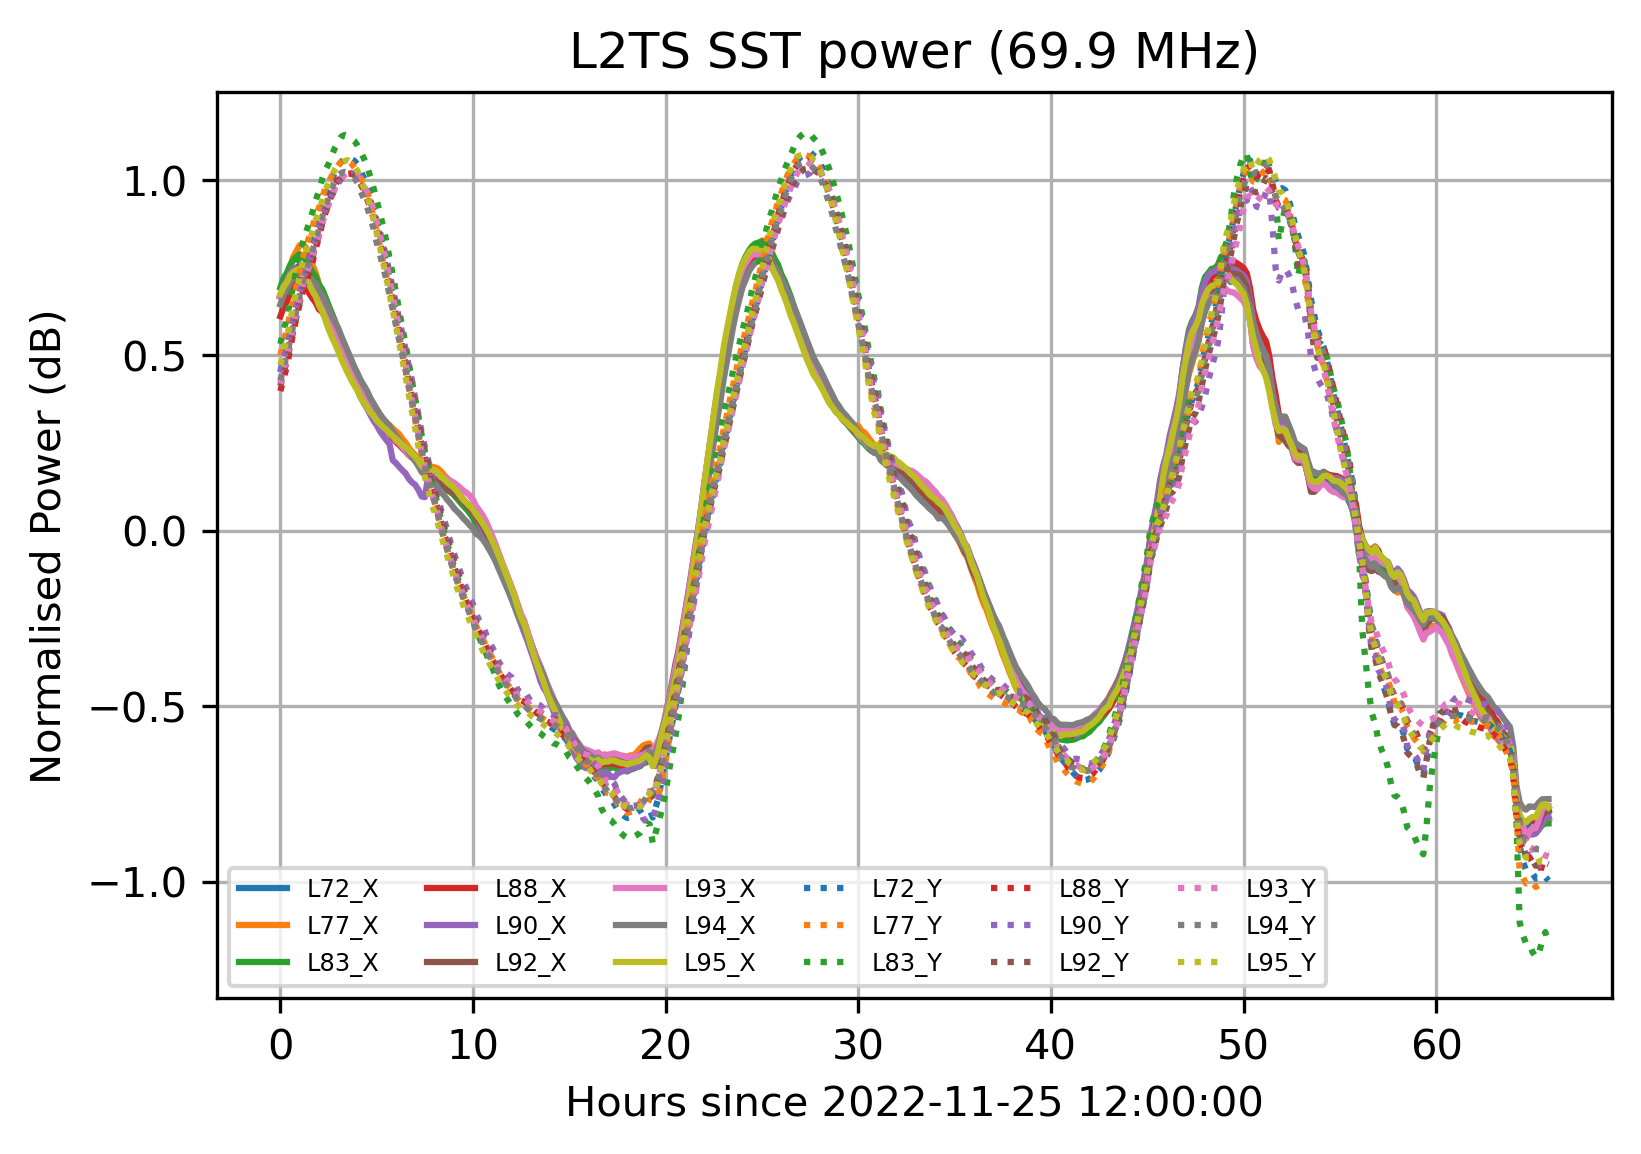

In [30]:
def plot_sst_time(D, f_measurement = 69.9):
    GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
    hour_of_day=np.arange(sst.D.shape[0])/60*tstep_min
    f_measurement = 69.9
    freqs = np.arange(512)/512*100
    fbin_loc = np.argmin(np.abs(freqs-f_measurement))

    plt.figure(dpi=300)
    for i in [fbin_loc]:
        Pwr=(10*np.log10(D[:,::2,i]))-GainADC
        Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
        for l in range(9):
            plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
    plt.gca().set_prop_cycle(None)
    for i in [fbin_loc]:
        Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
        Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
        for l in range(9):
            plt.plot(hour_of_day,Pwr[:,l],':',label=input_label[1+(l*2)]);

    plt.ylabel('Normalised Power (dB)')
    plt.legend(fontsize='xx-small',ncol=6)
    plt.xlabel('Hours since ' + START_TIME)
    plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
    plt.grid()
    
plot_sst_time(sst.D)

(-1.0, 9.0)

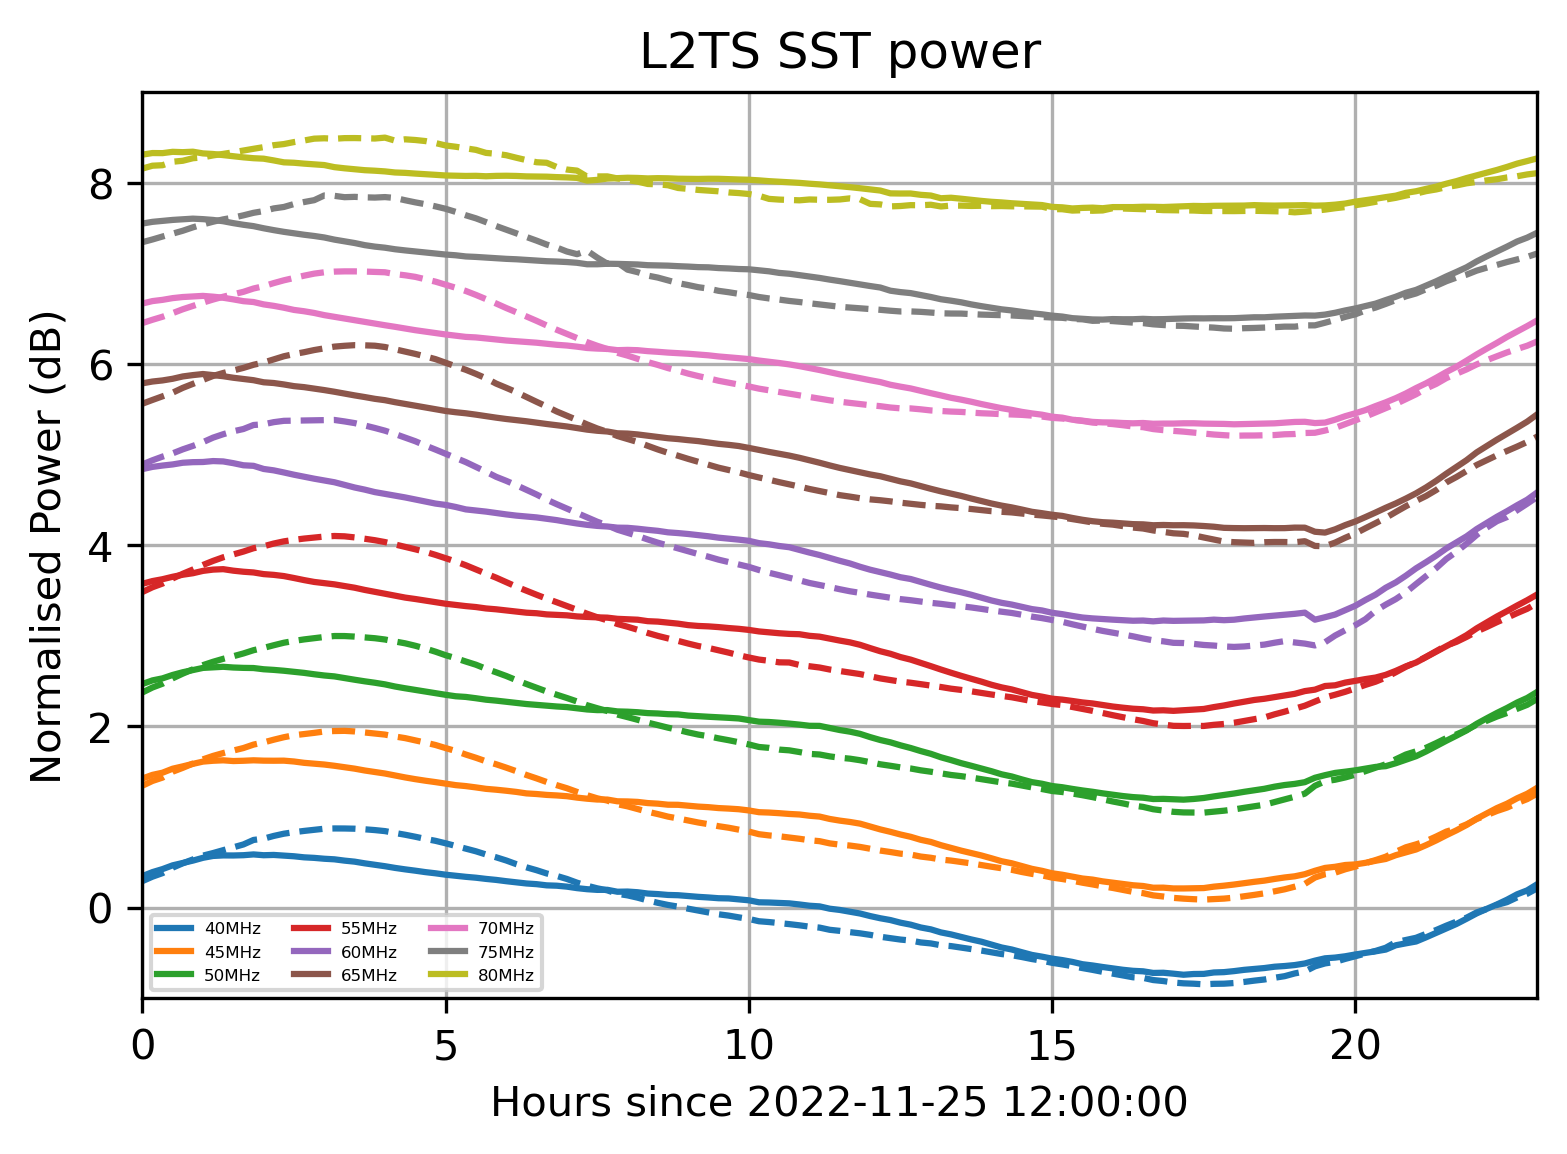

In [23]:
plt.figure(dpi=300)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(sst.D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(sst.D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day,Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.gca().set_prop_cycle(None)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(sst.D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(sst.D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[:],Pwr+cnt,'--');


#skyhour=np.arange(25*60/15)/4
#for cnt,freq in enumerate(range(40,85,5)):
#    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
#    skyP=10*np.log10(sky[0,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)
#
#    skyP=10*np.log10(sky[1,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour-1,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power")
plt.grid()
plt.xlim(0,23)
plt.ylim(-1,9)

Text(0.5, 1.0, ' Spectrogam of LBA input nr L95_Y')

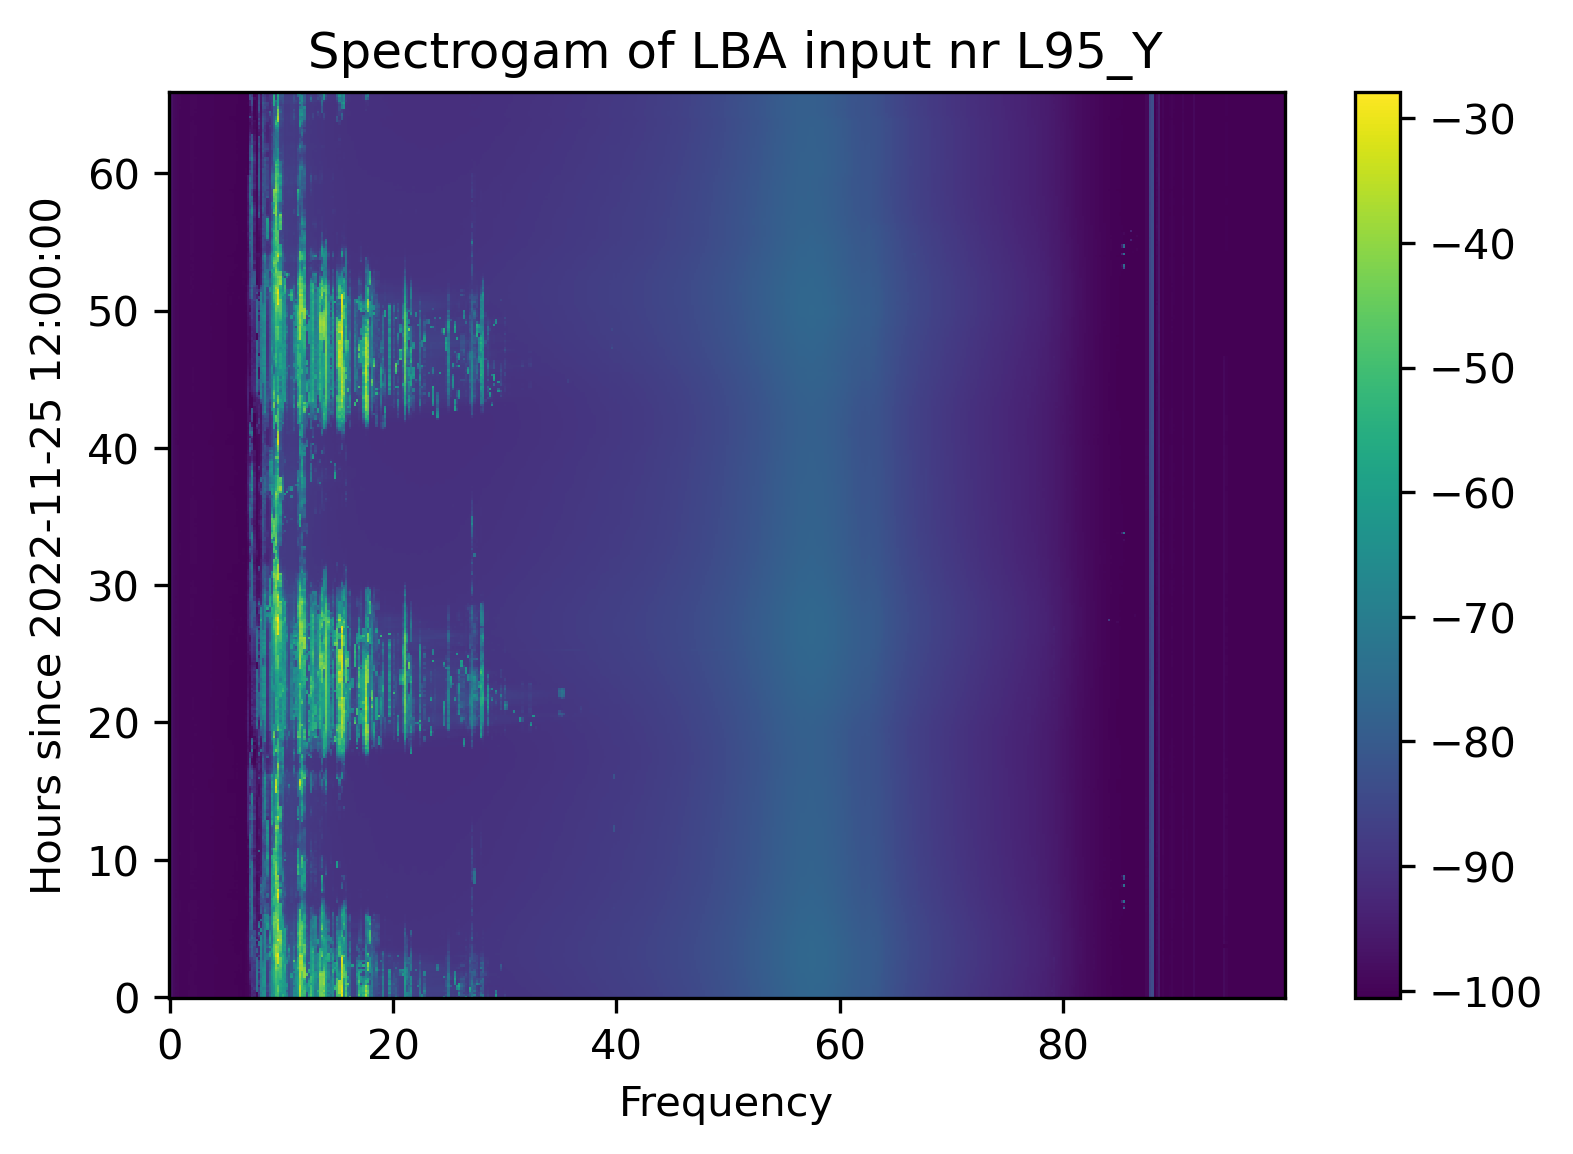

In [24]:
lba_si_nr = 17
plt.figure(dpi=300)
#plt.imshow(10*np.log10(sst.D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(sst.D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(sst.D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.title(f" Spectrogam of LBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, ' Spectrogam of LBA input nr L95_Y')

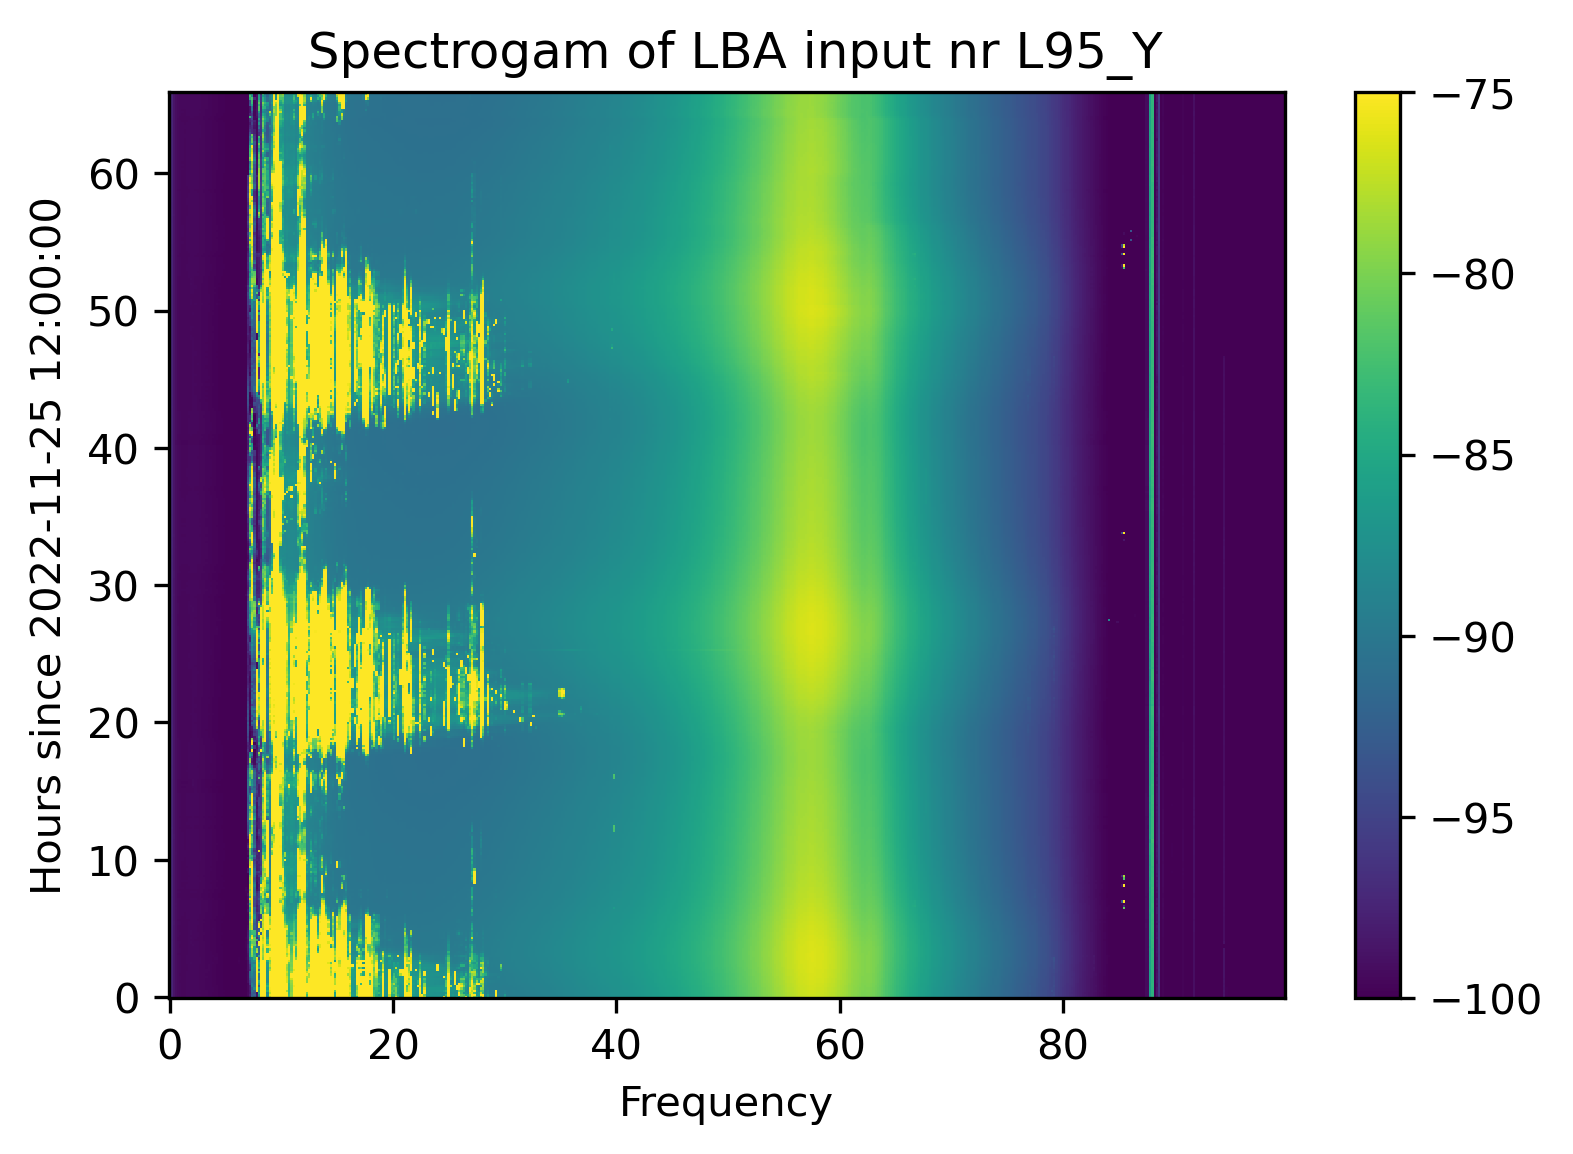

In [25]:
lba_si_nr = 17
plt.figure(dpi=300)
#plt.imshow(10*np.log10(sst.D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(sst.D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(sst.D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-100, -75])
plt.title(f" Spectrogam of LBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, '5 avaraged time slices of L95_Y from 2022-11-25 12:00:00')

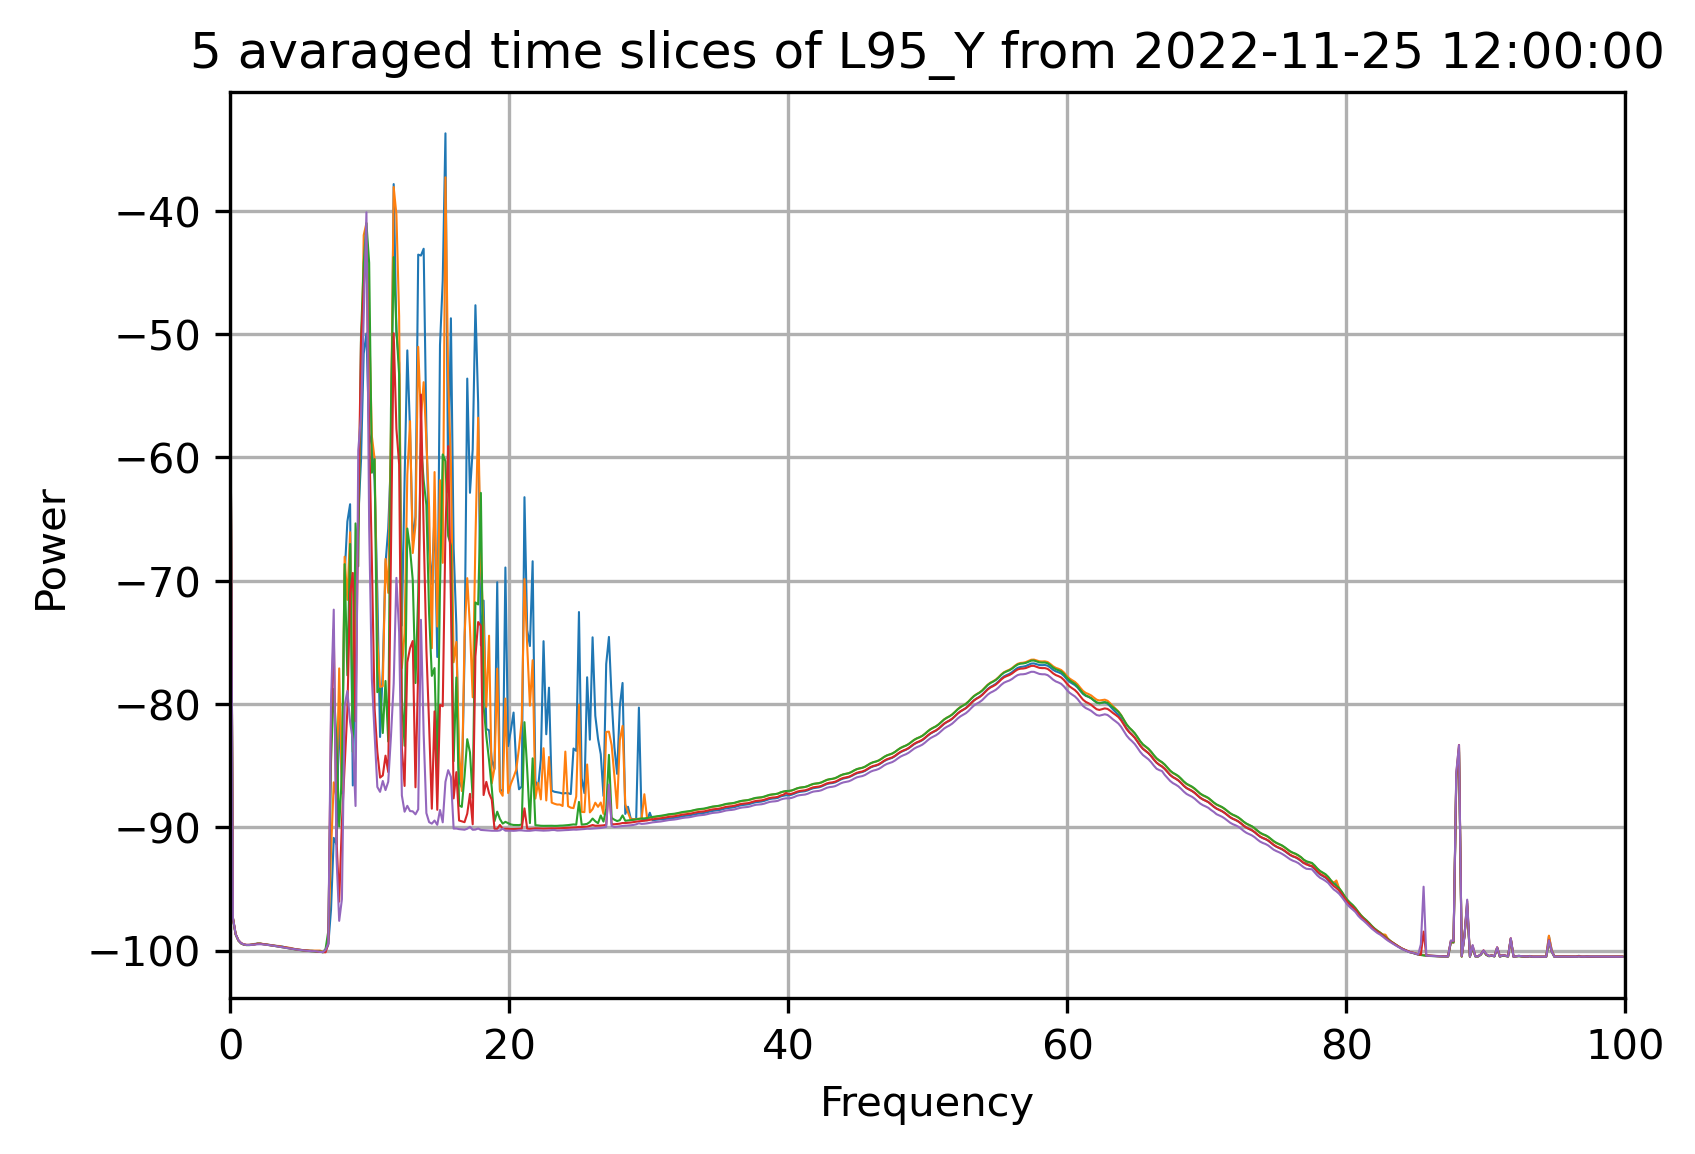

In [26]:
si = 17
slices = 5
pwr3=10*np.log10(sst.D[:,si,:])-GainADC
plt.figure(dpi=300)
for x in range(slices):
    plt.plot(f_as, np.mean(pwr3[(x*10+0):(x*10+10)],axis=0),linewidth=0.5)
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 100])
plt.title(f'{slices} avaraged time slices of {input_label[si]} from {START_TIME}')